In [1]:
import pandas as pd
df=pd.read_csv("linear_regression_dataset.csv")
df.head()

,Area_sqft,Bedrooms,House_Age,Price
0,1360,4,19,7172566
1,1794,4,17,9352703
2,1630,2,24,8279192
3,1595,3,19,8188062
4,2138,1,28,10768076


In [2]:
df.describe()

,Area_sqft,Bedrooms,House_Age,Price
count,200.000000,200.000000,200.000000,2.000000e+02
mean,2064.925000,2.895000,15.670000,1.057862e+07
std,819.162374,1.390555,8.660028,4.098700e+06
min,521.000000,1.000000,1.000000,2.660677e+06
25%,1435.750000,2.000000,8.000000,7.457238e+06
50%,2017.500000,3.000000,17.000000,1.039726e+07
75%,2767.500000,4.000000,23.000000,1.417546e+07
max,3477.000000,5.000000,29.000000,1.751671e+07


In [3]:
X=df[['Area_sqft','Bedrooms','House_Age']]
y=df.Price

In [4]:
X

,Area_sqft,Bedrooms,House_Age
0,1360,4,19
1,1794,4,17
2,1630,2,24
3,1595,3,19
4,2138,1,28
...,...,...,...
195,1995,4,20
196,1636,5,27
197,2353,2,21
198,2020,4,4


In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [6]:
X_test

,Area_sqft,Bedrooms,House_Age
149,2423,2,16
77,1495,1,13
44,3388,4,14
179,1806,1,19
93,992,4,1
114,2682,5,18
190,1757,5,21
167,1551,1,20
154,2178,5,24
97,3068,3,11


In [7]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [13]:
from sklearn.metrics import r2_score,mean_absolute_error
y_pred=model.predict(X_test)
print("R2 Score:",r2_score(y_test,y_pred))
print("MAE:",mean_absolute_error(y_test,y_pred))

R2 Score: 0.9999481443076687
MAE: 24802.047665636397


In [15]:
coef=pd.DataFrame({
    "Feature":X.columns,
    "Coefficient":model.coef_
})
coef

,Feature,Coefficient
0,Area_sqft,4995.804907
1,Bedrooms,97883.821215
2,House_Age,-1356.133018


In [11]:
model.predict([[2000,4,20]])

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([10357065.17782536])

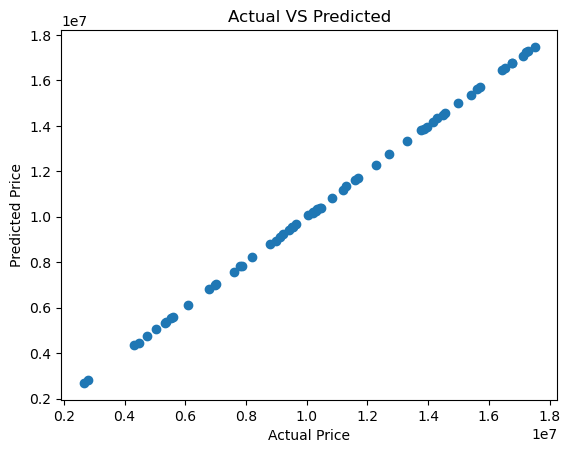

In [16]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title('Actual VS Predicted')
plt.show()